In [64]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import scipy.stats as stat
from scipy.stats import ttest_ind, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import os

In [65]:
df = pd.read_csv("diabetes_FT.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,0.865276,-0.005124,0.928458,-0.815354,0.217978,1.556957,1.0
1,-1.205989,-0.542772,0.546002,-0.815354,-0.874679,-0.163949,0.0
2,2.015979,-0.721988,-1.302538,-0.815354,-1.389789,-0.073375,1.0
3,-1.074480,-0.542772,0.163545,0.399244,-0.640538,-1.069690,0.0
4,0.503626,-2.872582,0.928458,1.355416,1.700869,0.017199,1.0
...,...,...,...,...,...,...,...
763,-0.679954,0.353308,1.757114,1.510471,0.108712,2.734419,0.0
764,0.010468,-0.184340,0.418516,-0.815354,0.717478,-0.526245,0.0
765,-0.022409,-0.005124,0.163545,0.631826,-0.937117,-0.254523,0.0
766,0.141977,-1.080421,-1.302538,-0.815354,-0.328351,1.285235,1.0


In [66]:
X = df.iloc[:,:-1].values
X

array([[ 0.86527574, -0.00512393,  0.92845833, -0.81535443,  0.21797752,
         1.55695702],
       [-1.20598931, -0.54277224,  0.5460018 , -0.81535443, -0.87467912,
        -0.16394935],
       [ 2.01597855, -0.72198835, -1.30253807, -0.81535443, -1.38978867,
        -0.07337533],
       ...,
       [-0.02240928, -0.00512393,  0.16354528,  0.6318261 , -0.93711664,
        -0.25452337],
       [ 0.14197684, -1.08042056, -1.30253807, -0.81535443, -0.3283508 ,
         1.28523497],
       [-0.94297153, -0.18434003,  0.67348731, -0.81535443, -0.28152266,
        -0.88854151]], shape=(768, 6))

In [67]:
Y = df.iloc[:,-1].values
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [ ]:
#Test train model

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.66, shuffle=True)

In [69]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [70]:
#Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=16)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[143  28]
 [ 36  55]]
Accuracy by confusion matrix: 0.7557251908396947


                  precision    recall  f1-score   support

without diabetes       0.80      0.84      0.82       171
   with diabetes       0.66      0.60      0.63        91

        accuracy                           0.76       262
       macro avg       0.73      0.72      0.72       262
    weighted avg       0.75      0.76      0.75       262

----------------------------------------------------------------------


In [72]:
#Naive Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[140  31]
 [ 34  57]]
Accuracy by confusion matrix: 0.7519083969465649


                  precision    recall  f1-score   support

without diabetes       0.80      0.82      0.81       171
   with diabetes       0.65      0.63      0.64        91

        accuracy                           0.75       262
       macro avg       0.73      0.72      0.72       262
    weighted avg       0.75      0.75      0.75       262

----------------------------------------------------------------------


In [74]:
#K-nearest neighbors

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[143  28]
 [ 36  55]]
Accuracy by confusion matrix: 0.7557251908396947


                  precision    recall  f1-score   support

without diabetes       0.80      0.84      0.82       171
   with diabetes       0.66      0.60      0.63        91

        accuracy                           0.76       262
       macro avg       0.73      0.72      0.72       262
    weighted avg       0.75      0.76      0.75       262

----------------------------------------------------------------------


In [76]:
#Decision tree Classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[127  44]
 [ 41  50]]
Accuracy by confusion matrix: 0.6755725190839694


                  precision    recall  f1-score   support

without diabetes       0.76      0.74      0.75       171
   with diabetes       0.53      0.55      0.54        91

        accuracy                           0.68       262
       macro avg       0.64      0.65      0.64       262
    weighted avg       0.68      0.68      0.68       262

----------------------------------------------------------------------


In [78]:
#Support Vector Classifier

In [79]:
from sklearn import svm
svm = svm.SVC(kernel='poly') 
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[157  14]
 [ 52  39]]
Accuracy by confusion matrix: 0.7480916030534351


                  precision    recall  f1-score   support

without diabetes       0.75      0.92      0.83       171
   with diabetes       0.74      0.43      0.54        91

        accuracy                           0.75       262
       macro avg       0.74      0.67      0.68       262
    weighted avg       0.75      0.75      0.73       262

----------------------------------------------------------------------


In [80]:
#Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, Y_train)

Y_pred_rf = rf_classifier.predict(X_test)

confusion_matrix_rf = metrics.confusion_matrix(Y_test, Y_pred_rf)

print("-" * 70)
print("Random Forest Classifier Report")
print("-" * 70)
print("Confusion Matrix:")
print(str(confusion_matrix_rf))

total_predictions = confusion_matrix_rf.sum()
if total_predictions > 0:
    acc_rf = (confusion_matrix_rf[0][0] + confusion_matrix_rf[1][1]) / total_predictions
    print("Accuracy by confusion matrix: " + str(acc_rf))
else:
    print("Cannot calculate accuracy: No predictions made or total predictions are zero.")

print("\n")

target_names = ['without diabetes', 'with diabetes'] # Make sure these match your Y_test labels (0 and 1)
print(classification_report(Y_test, Y_pred_rf, target_names=target_names))
print("-" * 70)

----------------------------------------------------------------------
Random Forest Classifier Report
----------------------------------------------------------------------
Confusion Matrix:
[[141  30]
 [ 37  54]]
Accuracy by confusion matrix: 0.7442748091603053


                  precision    recall  f1-score   support

without diabetes       0.79      0.82      0.81       171
   with diabetes       0.64      0.59      0.62        91

        accuracy                           0.74       262
       macro avg       0.72      0.71      0.71       262
    weighted avg       0.74      0.74      0.74       262

----------------------------------------------------------------------


In [82]:
#Hyperparameter Tuning
#Logistic Regression

In [83]:
from sklearn.model_selection import RepeatedStratifiedKFold
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.765180 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.762588 (0.043063) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.762588 (0.043063) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.762588 (0.043063) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.762588 (0.043063) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.762588 (0.043063) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.762588 (0.043063) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.762588 (0.043063) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.762588 (0.043063) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.763021 (0.043163) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.762161 (0.041321) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.762161 (0.041321) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.765180 (0.044027) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.748696 (0.039928) wit

In [84]:
lr = LogisticRegression(random_state=16,C=0.1,penalty='l2',
    dual=False,
    tol=0.0001,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    solver='liblinear',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,)

lr.fit(X_train, Y_train)
Y_pred = lr.predict(X)
confusion_matrix = metrics.confusion_matrix(Y, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y, Y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[434  66]
 [114 154]]
Accuracy by confusion matrix: 0.765625


                  precision    recall  f1-score   support

without diabetes       0.79      0.87      0.83       500
   with diabetes       0.70      0.57      0.63       268

        accuracy                           0.77       768
       macro avg       0.75      0.72      0.73       768
    weighted avg       0.76      0.77      0.76       768

----------------------------------------------------------------------


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [85]:
import pickle
pickle.dump(lr, open('lr.pkl','wb'))

In [86]:
#Evaluating Results

In [87]:
df_copy= pd.read_csv("diabetes_FS.csv")

In [88]:
df_copy

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,148.0,72.0,35.0,0.0,33.6,50.0,1.0
1,85.0,66.0,29.0,0.0,26.6,31.0,0.0
2,183.0,64.0,0.0,0.0,23.3,32.0,1.0
3,89.0,66.0,23.0,94.0,28.1,21.0,0.0
4,137.0,40.0,35.0,168.0,43.1,33.0,1.0
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,63.0,0.0
764,122.0,70.0,27.0,0.0,36.8,27.0,0.0
765,121.0,72.0,23.0,112.0,26.2,30.0,0.0
766,126.0,60.0,0.0,0.0,30.1,47.0,1.0


In [89]:
Y_pred = pd.DataFrame(Y_pred, columns = ['Y_pred'])

In [90]:
df_results = pd.concat([df_copy, Y_pred], axis=1)
df_results

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome,Y_pred
0,148.0,72.0,35.0,0.0,33.6,50.0,1.0,1.0
1,85.0,66.0,29.0,0.0,26.6,31.0,0.0,0.0
2,183.0,64.0,0.0,0.0,23.3,32.0,1.0,1.0
3,89.0,66.0,23.0,94.0,28.1,21.0,0.0,0.0
4,137.0,40.0,35.0,168.0,43.1,33.0,1.0,1.0
...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,63.0,0.0,0.0
764,122.0,70.0,27.0,0.0,36.8,27.0,0.0,0.0
765,121.0,72.0,23.0,112.0,26.2,30.0,0.0,0.0
766,126.0,60.0,0.0,0.0,30.1,47.0,1.0,0.0


In [91]:
df_results.to_csv('diabetes_RS.csv', encoding='utf-8', index=False)

In [92]:
#Visualizing Results

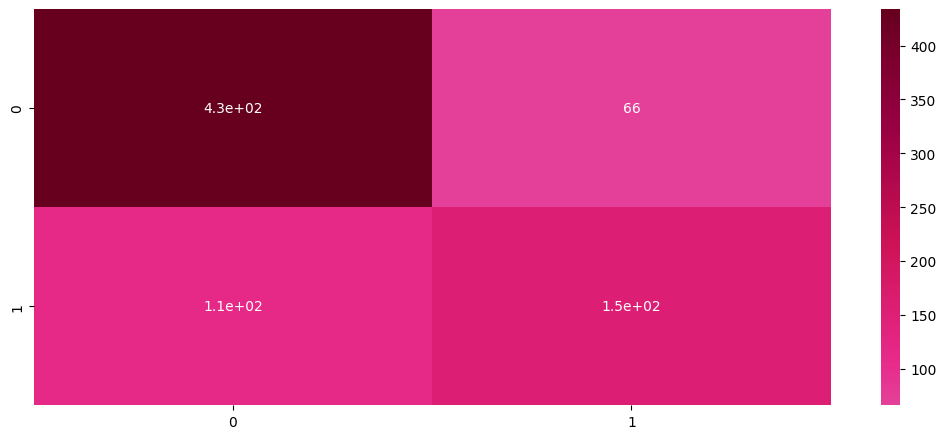

In [93]:
dataplot = sns.heatmap(confusion_matrix, cmap='PuRd', annot=True, center=0)

<Axes: title={'center': 'Predicted'}, xlabel='Glucose', ylabel='BMI'>

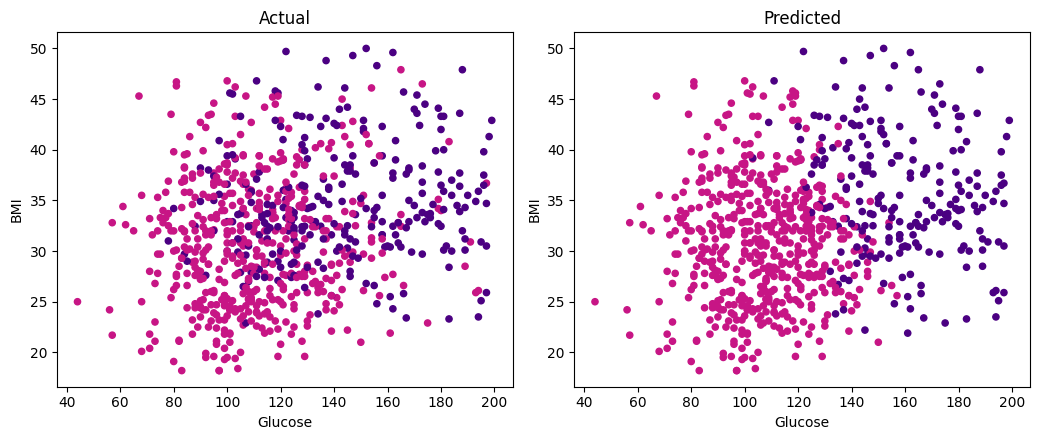

In [94]:
plt.rcParams["figure.figsize"] = [10.50, 4.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(1, 2)

colors = {0:'MEDIUMVIOLETRED', 1:'INDIGO'}
 
df_results.plot.scatter("Glucose","BMI",title="Actual",ax=axis[0],c=df_results['Outcome'].map(colors))
df_results.plot.scatter("Glucose","BMI",title="Predicted",ax=axis[1],c=df_results['Y_pred'].map(colors))
